In [1]:
#Bibliotecas
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
import os
import pandas as pd
from skimage.feature import hog

In [2]:
#Machine Learning 
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Modelagem da Janela

Utilização dos melhores descritores para classificação das janelas.

# Situação

Imagens salvas em:
- img_stoma1/2/3/4/5
- erro_stoma1/2/3/4/5

In [3]:
#Leitura dos arquivos contendo os descritores

dir_desc_stoma1 = "Kfolds/k1/stomata/descriptor/"
dir_desc_erro1 = "Kfolds/k1/error/descriptor/"

dir_desc_stoma2 = "Kfolds/k2/stomata/descriptor/"
dir_desc_erro2 = "Kfolds/k2/error/descriptor/"

dir_desc_stoma3 = "Kfolds/k3/stomata/descriptor/"
dir_desc_erro3 = "Kfolds/k3/error/descriptor/"

dir_desc_stoma4 = "Kfolds/k4/stomata/descriptor/"
dir_desc_erro4 = "Kfolds/k4/error/descriptor/"

dir_desc_stoma5 = "Kfolds/k5/stomata/descriptor/"
dir_desc_erro5 = "Kfolds/k5/error/descriptor/"

In [4]:
#Obtenção dos arquivos
list_desc_stoma1 = sorted(os.listdir(dir_desc_stoma1))
list_desc_erro1 = sorted(os.listdir(dir_desc_erro1))

list_desc_stoma2 = sorted(os.listdir(dir_desc_stoma2))
list_desc_erro2 = sorted(os.listdir(dir_desc_erro2))

list_desc_stoma3 = sorted(os.listdir(dir_desc_stoma3))
list_desc_erro3 = sorted(os.listdir(dir_desc_erro3))

list_desc_stoma4 = sorted(os.listdir(dir_desc_stoma4))
list_desc_erro4 = sorted(os.listdir(dir_desc_erro4))

list_desc_stoma5 = sorted(os.listdir(dir_desc_stoma5))
list_desc_erro5 = sorted(os.listdir(dir_desc_erro5))

In [5]:
#Obtenção dos descritores

#Dicionários
k1_stoma = {}
k2_stoma = {}
k3_stoma = {}
k4_stoma = {}
k5_stoma = {}

k1_erro = {}
k2_erro = {}
k3_erro = {}
k4_erro = {}
k5_erro = {}

In [6]:
list_desc_stoma1

['196_14.txt', '197_159.txt', '198_13.txt', '199_129.txt', '200_115.txt']

In [7]:
#Criando hashes
for i in list_desc_stoma1:
    f = open(dir_desc_stoma1+i, 'r')
    line = f.readline()
    line = line.rstrip()
    line = line.split(";")
    aux = i.split(".")
    k1_stoma[aux[0]] = list()
    k1_stoma[aux[0]].append(line)
    
for i in list_desc_erro1:
    f = open(dir_desc_erro1+i, 'r')
    line = f.readline()
    line = line.rstrip()
    line = line.split(";")
    aux = i.split(".")
    k1_erro[aux[0]] = list()
    k1_erro[aux[0]].append(line)

In [8]:
#Criando hashes
for i in list_desc_stoma2:
    f = open(dir_desc_stoma2+i, 'r')
    line = f.readline()
    line = line.rstrip()
    line = line.split(";")
    aux = i.split(".")
    k2_stoma[aux[0]] = list()
    k2_stoma[aux[0]].append(line)
    
for i in list_desc_erro2:
    f = open(dir_desc_erro2+i, 'r')
    line = f.readline()
    line = line.rstrip()
    line = line.split(";")
    aux = i.split(".")
    k2_erro[aux[0]] = list()
    k2_erro[aux[0]].append(line)

In [9]:
#Criando hashes
for i in list_desc_stoma3:
    f = open(dir_desc_stoma3+i, 'r')
    line = f.readline()
    line = line.rstrip()
    line = line.split(";")
    aux = i.split(".")
    k3_stoma[aux[0]] = list()
    k3_stoma[aux[0]].append(line)
    
for i in list_desc_erro3:
    f = open(dir_desc_erro3+i, 'r')
    line = f.readline()
    line = line.rstrip()
    line = line.split(";")
    aux = i.split(".")
    k3_erro[aux[0]] = list()
    k3_erro[aux[0]].append(line)

In [10]:
#Criando hashes
for i in list_desc_stoma4:
    f = open(dir_desc_stoma4+i, 'r')
    line = f.readline()
    line = line.rstrip()
    line = line.split(";")
    aux = i.split(".")
    k4_stoma[aux[0]] = list()
    k4_stoma[aux[0]].append(line)
    
for i in list_desc_erro4:
    f = open(dir_desc_erro4+i, 'r')
    line = f.readline()
    line = line.rstrip()
    line = line.split(";")
    aux = i.split(".")
    k4_erro[aux[0]] = list()
    k4_erro[aux[0]].append(line)

In [11]:
#Criando hashes
for i in list_desc_stoma5:
    f = open(dir_desc_stoma5+i, 'r')
    line = f.readline()
    line = line.rstrip()
    line = line.split(";")
    aux = i.split(".")
    k5_stoma[aux[0]] = list()
    k5_stoma[aux[0]].append(line)
    
for i in list_desc_erro5:
    f = open(dir_desc_erro5+i, 'r')
    line = f.readline()
    line = line.rstrip()
    line = line.split(";")
    aux = i.split(".")
    k5_erro[aux[0]] = list()
    k5_erro[aux[0]].append(line)

# Adicionar imagem

In [12]:
#Imagens a serem utilizadas

#K = 1
#Diretórios
dir_stoma1 = "Kfolds/k1/stomata/imagens/"
dir_erro1 = "Kfolds/k1/error/imagens/"

#Nomes dos arquivos
list_stoma1 = sorted(os.listdir(dir_stoma1))
list_erro1 = sorted(os.listdir(dir_erro1))

#Leitura das imagens
for i in list_stoma1:
    aux = i.split(".")
    k1_stoma[aux[0]].append(cv2.imread(dir_stoma1+i))
    
for i in list_erro1:
    aux = i.split(".")
    k1_erro[aux[0]].append(cv2.imread(dir_erro1+i))

In [13]:
#K = 2
#Diretórios
dir_stoma2 = "Kfolds/k2/stomata/imagens/"
dir_erro2 = "Kfolds/k2/error/imagens/"

#Nomes dos arquivos
list_stoma2 = sorted(os.listdir(dir_stoma2))
list_erro2 = sorted(os.listdir(dir_erro2))

#Leitura das imagens
for i in list_stoma2:
    aux = i.split(".")
    k2_stoma[aux[0]].append(cv2.imread(dir_stoma2+i))
    
for i in list_erro2:
    aux = i.split(".")
    k2_erro[aux[0]].append(cv2.imread(dir_erro2+i))

In [14]:
#K = 3
#Diretórios
dir_stoma3 = "Kfolds/k3/stomata/imagens/"
dir_erro3 = "Kfolds/k3/error/imagens/"

#Nomes dos arquivos
list_stoma3 = sorted(os.listdir(dir_stoma3))
list_erro3 = sorted(os.listdir(dir_erro3))

#Leitura das imagens
for i in list_stoma3:
    aux = i.split(".")
    k3_stoma[aux[0]].append(cv2.imread(dir_stoma3+i))
    
for i in list_erro3:
    aux = i.split(".")
    k3_erro[aux[0]].append(cv2.imread(dir_erro3+i))

In [15]:
#K = 4
#Diretórios
dir_stoma4 = "Kfolds/k4/stomata/imagens/"
dir_erro4 = "Kfolds/k4/error/imagens/"

#Nomes dos arquivos
list_stoma4 = sorted(os.listdir(dir_stoma4))
list_erro4 = sorted(os.listdir(dir_erro4))

#Leitura das imagens
for i in list_stoma4:
    aux = i.split(".")
    k4_stoma[aux[0]].append(cv2.imread(dir_stoma4+i))
    
for i in list_erro4:
    aux = i.split(".")
    k4_erro[aux[0]].append(cv2.imread(dir_erro4+i))

In [16]:
#K = 5
#Diretórios
dir_stoma5 = "Kfolds/k5/stomata/imagens/"
dir_erro5 = "Kfolds/k5/error/imagens/"

#Nomes dos arquivos
list_stoma5 = sorted(os.listdir(dir_stoma5))
list_erro5 = sorted(os.listdir(dir_erro5))

#Leitura das imagens
for i in list_stoma5:
    aux = i.split(".")
    k5_stoma[aux[0]].append(cv2.imread(dir_stoma5+i))
    
for i in list_erro5:
    aux = i.split(".")
    k5_erro[aux[0]].append(cv2.imread(dir_erro5+i))

# Tenho k-folds com hashes com imagem + treino
k1_stoma
k1_erro

k2_stoma
k2_erro

k3_stoma
k3_erro

k4_stoma
k4_erro

k5_stoma
k5_erro

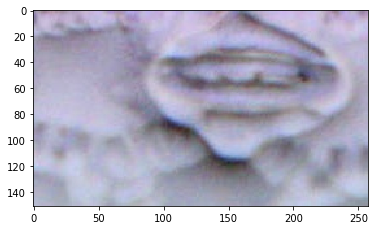

In [37]:
plt.imshow(k1_stoma["196_14"][1])

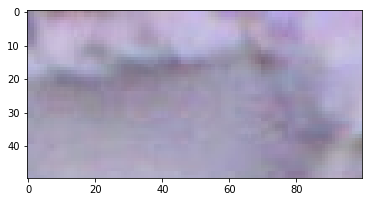

In [41]:
aux = k1_stoma["196_14"][1]
crop_image = aux[0:0+50, 0:0+100]
plt.imshow(crop_image)


In [64]:
#Situação 1 - Janela em k = 1

#Obter vetores para treinamento
classes = list()

for key in k2_stoma:
    classes.append(k2_stoma[key][0])

for key in k2_erro:
    classes.append(k2_erro[key][0])
    
for key in k3_stoma:
    classes.append(k3_stoma[key][0])

for key in k3_erro:
    classes.append(k3_erro[key][0])

for key in k4_stoma:
    classes.append(k4_stoma[key][0])

for key in k4_erro:
    classes.append(k4_erro[key][0])
    
for key in k5_stoma:
    classes.append(k5_stoma[key][0])

for key in k5_erro:
    classes.append(k5_erro[key][0])
    
df = pd.DataFrame(classes)
df['class'] = np.concatenate((np.repeat(1,len(k2_stoma)),np.repeat(0,len(k2_erro)),np.repeat(1,len(k3_stoma)),
               np.repeat(0,len(k3_erro)),np.repeat(1,len(k4_stoma)),np.repeat(0,len(k4_erro)),
               np.repeat(1,len(k5_stoma)),np.repeat(0,len(k5_erro))))

In [ ]:
#Criar modelo de aprendizado com df

def ML(features,model):

In [ ]:
#Situação 1 - Janela em k = 1
dir = "stoma/"

matrices = {}

for key in k1_stoma:
    #Image
    aux = key.split("_")
    
    #Read Image
    image = cv2.imread(dir+aux[0]+".jpg")
    
 